# 01. Exploratory Analysis - Nubank AI Core Transaction Dataset Interview Project

This notebook is a collection of exploratory analyses on the dataset provided for the Nubank AI Core Transaction Dataset Interview Project. The content here is not supposed to be presentation-grade, but more of a stream-of-consciousness type of exploration of the dataset. 

In [1]:
import pandas as pd
from pprint import pprint
import seaborn as sns
import matplotlib as mpl

sns.set_theme()
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#8A05BE", "#BA4DE3", "#191919"])


## Dataset

In [2]:
df = pd.read_csv('./nubank_raw.csv')

/tmp/ipykernel_743/825863674.py:1: DtypeWarning: Columns (12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./nubank_raw.csv')


In [3]:
df.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,890,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,NaN,NaN,NaN,NaN,NaN
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON,NaN,NaN,NaN,NaN,NaN
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,NaN,NaN,NaN,NaN,NaN
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",NaN,NaN,NaN,NaN,NaN
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['Year-Month', 'Agency Number', 'Agency Name', 'Cardholder Last Name',
       'Cardholder First Initial', 'Amount', 'Vendor', 'Transaction Date',
       'Posted Date', 'Merchant Category Code (MCC)', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'],
      dtype='object')

In [5]:
len(df)

442458

My first thought here is that we don't have much to work with. The fields that we have don't have a clear classification/regression signal, so we might have to get creative. However, some categories such as MCC, Vendor and Amount may have some cool text data to extract.

Moreover, there seems to be 5 columns that are pretty vague (10,11,12,13,14) and have no information on them. Let's take a look at them first so we can figure out if we can discard them right away.

In [6]:
def is_date(s):
    if pd.isna(s):
            return False
    try:
        pd.to_datetime(s)
        return True
    except ValueError:
        return False

def print_column_information(df: pd.DataFrame, column_name: str):
    sized = df.groupby(column_name).size()
    column_size = len(sized)
    n_dates = df[df[column_name].apply(is_date) == True].shape[0]
    n_empty = sum([x == '' for x in df[column_name]])
    n_nan = sum([pd.isna(x) for x in df[column_name]])
    uniques = sized.index

    print("-"*50)
    print(f'Column: {column_name}')
    print(f"Column total size: {len(df[column_name])}")
    print(f"Column non-nan size: {len(df[column_name].dropna())}")
    print(f'Column unique size: {column_size}')
    print(f'Number of dates: {n_dates}')
    print(f'Number of empty strings: {n_empty}')
    print(f'Number of NaN: {n_nan}')
    print(f'Unique values: {uniques}')
    print("-"*50)

    

print_column_information(df, 'Unnamed: 10')
print_column_information(df, 'Unnamed: 11')
print_column_information(df, 'Unnamed: 12')
print_column_information(df, 'Unnamed: 13')
print_column_information(df, 'Unnamed: 14')

--------------------------------------------------
Column: Unnamed: 10
Column total size: 442458
Column non-nan size: 275
Column unique size: 103
Number of dates: 146
Number of empty strings: 0
Number of NaN: 442183
Unique values: Index(['01/03/2014 12:00:00 AM', '01/10/2014 12:00:00 AM',
       '01/13/2014 12:00:00 AM', '01/14/2014 12:00:00 AM',
       '01/15/2014 12:00:00 AM', '01/20/2014 12:00:00 AM',
       '01/22/2014 12:00:00 AM', '02/03/2014 12:00:00 AM',
       '02/10/2014 12:00:00 AM', '02/11/2014 12:00:00 AM',
       ...
       'COMPUTERS, COMPUTER PERIPHERAL EQUIPMENT, SOFTWARE',
       'CONTINUITY/SUBSCRIPTION MERCHANTS',
       'DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP AND SUP.',
       'DMI  DELL K-12/GOVT', 'ELECTRICAL PARTS AND EQUIPMENT',
       'ELECTRONICS STORES', 'INDUSTRIAL SUPPLIES NOT ELSEWHERE CLASSIFIED',
       'MISCELLANEOUS PUBLISHING AND PRINTING SERVICES',
       'PLUMBING AND HEATING EQUIPMENT AND SUPPLIES',
       'STATIONERY, OFFICE SUPPLIES, PRI

In [7]:
df[pd.isna(df['Unnamed: 14']) == False]

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
190452,201311,76000,UNIVERSITY OF OKLAHOMA,SADEGHI,K,CLEANING,0.8mm NOZZLE,EACH|PIN,CLEANING,1.0mm,212.87,TEQUIPMENT.NET,11/03/2013 12:00:00 AM,11/04/2013 12:00:00 AM,ELECTRICAL PARTS AND EQUIPMENT


## Cleaning

It seems that these unnamed columns contain values that are badly parsed (example above). It seems that the input may have been mixed up and it requires manual clean-up. To not accidently parse bad values, I'll opt to simply remove these badly parsed values from the dataset.

In [8]:
df[pd.isna(df['Unnamed: 13']) == False]

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
190452,201311,76000,UNIVERSITY OF OKLAHOMA,SADEGHI,K,CLEANING,0.8mm NOZZLE,EACH|PIN,CLEANING,1.0mm,212.87,TEQUIPMENT.NET,11/03/2013 12:00:00 AM,11/04/2013 12:00:00 AM,ELECTRICAL PARTS AND EQUIPMENT
398823,201406,34000,STATE DEPARTMENT OF HEALTH,Farris,S,MMag Duo,USB/HID,3T,Bl PCE,54.14,DMI DELL K-12/GOVT,06/19/2014 12:00:00 AM,06/19/2014 12:00:00 AM,"COMPUTERS, COMPUTER PERIPHERAL EQUIPMENT, SOFT...",NaN


In [9]:
df[pd.isna(df['Unnamed: 12']) == False]

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
190452,201311,76000,UNIVERSITY OF OKLAHOMA,SADEGHI,K,CLEANING,0.8mm NOZZLE,EACH|PIN,CLEANING,1.0mm,212.87,TEQUIPMENT.NET,11/03/2013 12:00:00 AM,11/04/2013 12:00:00 AM,ELECTRICAL PARTS AND EQUIPMENT
398823,201406,34000,STATE DEPARTMENT OF HEALTH,Farris,S,MMag Duo,USB/HID,3T,Bl PCE,54.14,DMI DELL K-12/GOVT,06/19/2014 12:00:00 AM,06/19/2014 12:00:00 AM,"COMPUTERS, COMPUTER PERIPHERAL EQUIPMENT, SOFT...",NaN


In [10]:
df[pd.isna(df['Unnamed: 11']) == False]

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
3247,201307,1000,OKLAHOMA STATE UNIVERSITY,Sisco,K,0 - 500 Co EACH|MyLibrary Plus,MyL,25,CTC CONSTANTCONTACT.COM,07/09/2013 12:00:00 AM,07/10/2013 12:00:00 AM,CONTINUITY/SUBSCRIPTION MERCHANTS,NaN,NaN,NaN
7461,201307,1000,OKLAHOMA STATE UNIVERSITY,Hudson,J,2501 - 500 EACH|MyLibrary Plus,MyL,55,CTC CONSTANTCONTACT.COM,07/19/2013 12:00:00 AM,07/22/2013 12:00:00 AM,CONTINUITY/SUBSCRIPTION MERCHANTS,NaN,NaN,NaN
7719,201307,1000,OKLAHOMA STATE UNIVERSITY,Kiner,K,0 - 500 Co EACH|MyLibrary Plus,MyL,20,CTC CONSTANTCONTACT.COM,07/21/2013 12:00:00 AM,07/22/2013 12:00:00 AM,CONTINUITY/SUBSCRIPTION MERCHANTS,NaN,NaN,NaN
14038,201308,1000,OKLAHOMA STATE UNIVERSITY,Sisco,K,0 - 500 Co EACH|MyLibrary Plus,MyL,25,CTC CONSTANTCONTACT.COM,08/09/2013 12:00:00 AM,08/12/2013 12:00:00 AM,CONTINUITY/SUBSCRIPTION MERCHANTS,NaN,NaN,NaN
18697,201308,1000,OKLAHOMA STATE UNIVERSITY,Kiner,K,0 - 500 Co EACH|MyLibrary Plus,MyL,20,CTC CONSTANTCONTACT.COM,08/21/2013 12:00:00 AM,08/22/2013 12:00:00 AM,CONTINUITY/SUBSCRIPTION MERCHANTS,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424586,201406,76000,UNIVERSITY OF OKLAHOMA,DAVIS,M,10001 - 25 EACH|Survey,Free Monthl,195,CTC CONSTANTCONTACT.COM,06/11/2014 12:00:00 AM,06/12/2014 12:00:00 AM,CONTINUITY/SUBSCRIPTION MERCHANTS,NaN,NaN,NaN
426287,201406,76000,UNIVERSITY OF OKLAHOMA,O'DELL,D,10001 - 25 EACH|Survey,Free Monthl,195,CTC CONSTANTCONTACT.COM,06/02/2014 12:00:00 AM,06/03/2014 12:00:00 AM,CONTINUITY/SUBSCRIPTION MERCHANTS,NaN,NaN,NaN
426404,201406,76000,UNIVERSITY OF OKLAHOMA,BRADFORD,L,2501 - 500 EACH|EventSpot,11 - 20,125,CTC CONSTANTCONTACT.COM,06/02/2014 12:00:00 AM,06/03/2014 12:00:00 AM,CONTINUITY/SUBSCRIPTION MERCHANTS,NaN,NaN,NaN
428992,201405,77000,UNIV. OF OKLA. HEALTH SCIENCES CENTER,COLBERT,L,501 - 2500 EACH|MyLibrary Plus,MyL,35,CTC CONSTANTCONTACT.COM,05/10/2014 12:00:00 AM,05/12/2014 12:00:00 AM,CONTINUITY/SUBSCRIPTION MERCHANTS,NaN,NaN,NaN


In [11]:
df[pd.isna(df['Unnamed: 10']) == False]

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
473,201307,1000,OKLAHOMA STATE UNIVERSITY,Livsey,K,0 - 500 Co EACH,15,CTC CONSTANTCONTACT.COM,07/26/2013 12:00:00 AM,07/29/2013 12:00:00 AM,CONTINUITY/SUBSCRIPTION MERCHANTS,NaN,NaN,NaN,NaN
3247,201307,1000,OKLAHOMA STATE UNIVERSITY,Sisco,K,0 - 500 Co EACH|MyLibrary Plus,MyL,25,CTC CONSTANTCONTACT.COM,07/09/2013 12:00:00 AM,07/10/2013 12:00:00 AM,CONTINUITY/SUBSCRIPTION MERCHANTS,NaN,NaN,NaN
5199,201307,1000,OKLAHOMA STATE UNIVERSITY,Vandiver,C,0 - 1 Published EACH,20,CTC CONSTANTCONTACT.COM,07/17/2013 12:00:00 AM,07/18/2013 12:00:00 AM,CONTINUITY/SUBSCRIPTION MERCHANTS,NaN,NaN,NaN,NaN
5280,201307,1000,OKLAHOMA STATE UNIVERSITY,Leslie,C,501 - 2500 EACH,30,CTC CONSTANTCONTACT.COM,07/15/2013 12:00:00 AM,07/16/2013 12:00:00 AM,CONTINUITY/SUBSCRIPTION MERCHANTS,NaN,NaN,NaN,NaN
7461,201307,1000,OKLAHOMA STATE UNIVERSITY,Hudson,J,2501 - 500 EACH|MyLibrary Plus,MyL,55,CTC CONSTANTCONTACT.COM,07/19/2013 12:00:00 AM,07/22/2013 12:00:00 AM,CONTINUITY/SUBSCRIPTION MERCHANTS,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434614,201406,77000,UNIV. OF OKLA. HEALTH SCIENCES CENTER,COLBERT,L,501 - 2500 EACH|MyLibrary Plus,MyL,35,CTC CONSTANTCONTACT.COM,06/10/2014 12:00:00 AM,06/11/2014 12:00:00 AM,CONTINUITY/SUBSCRIPTION MERCHANTS,NaN,NaN,NaN
440606,201405,98000,GRAND RIVER DAM AUTH.,Ragsdale,M,CABL EA,264.8,STUART C IRBY,05/19/2014 12:00:00 AM,05/20/2014 12:00:00 AM,ELECTRICAL PARTS AND EQUIPMENT,NaN,NaN,NaN,NaN
440608,201405,98000,GRAND RIVER DAM AUTH.,Ragsdale,M,BR,585.5,STUART C IRBY,05/19/2014 12:00:00 AM,05/20/2014 12:00:00 AM,ELECTRICAL PARTS AND EQUIPMENT,NaN,NaN,NaN,NaN
441920,201406,98000,GRAND RIVER DAM AUTH.,Ragsdale,M,BRZ EA,443.5,STUART C IRBY,06/09/2014 12:00:00 AM,06/10/2014 12:00:00 AM,ELECTRICAL PARTS AND EQUIPMENT,NaN,NaN,NaN,NaN


In [12]:
before_len = len(df)
df = df[pd.isna(df['Unnamed: 10']) == True]
df = df[pd.isna(df['Unnamed: 11']) == True]
df = df[pd.isna(df['Unnamed: 12']) == True]
df = df[pd.isna(df['Unnamed: 13']) == True]
df = df[pd.isna(df['Unnamed: 14']) == True]
after_len = len(df)
df.drop(columns=['Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'], inplace=True)
print(f"Removed {before_len - after_len} rows")

Removed 275 rows


In [13]:
df

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,890,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS"
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT..."
...,...,...,...,...,...,...,...,...,...,...
442453,201406,98000,GRAND RIVER DAM AUTH.,Cardholder,e,992,TOTAL VALVE SYSTEMS,06/20/2014 12:00:00 AM,06/23/2014 12:00:00 AM,HARDWARE EQUIPMENT AND SUPPLIES
442454,201406,98000,GRAND RIVER DAM AUTH.,Cardholder,e,2415,PRYOR WASTE & RECYCLING L,06/20/2014 12:00:00 AM,06/23/2014 12:00:00 AM,"UTILITIES - ELECTRIC,GAS,WATER,SANITARY"
442455,201406,98000,GRAND RIVER DAM AUTH.,Cardholder,e,177.5,ACCURATE ENVIROMENTAL LAB,06/20/2014 12:00:00 AM,06/23/2014 12:00:00 AM,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED
442456,201406,98000,GRAND RIVER DAM AUTH.,Cardholder,e,32457,RED BUD SERVICE INC,06/19/2014 12:00:00 AM,06/23/2014 12:00:00 AM,PROFESSIONAL SERVICES NOT ELSEWHERE CLASSIFIED


## Exploration

Let's take a look at the values that are present in the dataset and see if we can extract any valuable information just from visual analysis.

### 1. Agencies

Let's start by exploring the agency names and numbers and see what we might find.

In total we have 124 unique agency names. However, it seems that some names may be duplicated with some typos, because we only have 116 unique agency numbers. This is the case for example for `BD. OF EXAM. FOR LT CARE ADMIN` and `BD. OF EXAM. FOR LT CARE ADMIN.`.

In [14]:
df.groupby(['Agency Name']).size()

Agency Name
ARDMORE HIGHER EDUCATION CENTER      59
ATTORNEY GENERAL                   1495
BD. OF CHEM. TEST ALCOHOL/DRUG       82
BD. OF EXAM. FOR LT CARE ADMIN       17
BD. OF EXAM. FOR LT CARE ADMIN.      15
                                   ... 
WATER RESOURCES BOARD              1388
WILL ROGERS MEMORIAL COMMISSION      48
WORKER'S COMP. COMMISSION             1
WORKERS COMPENSATION COURT           11
`DEPARTMENT OF EDUCATION            924
Length: 124, dtype: int64

In [15]:
df.groupby(['Agency Number']).size()

Agency Number
1000     115926
2000        143
2200         10
2500       5679
3900        170
          ...  
86500         1
87500       107
88000        48
92200      1075
98000     10422
Length: 116, dtype: int64

In [16]:
df['Agency Name'].unique()

array(['OKLAHOMA STATE UNIVERSITY', 'OKLAHOMA ACCOUNTANCY BOARD',
       'OKLAHOMA ABSTRACTORS BOARD', 'OKLAHOMA MILITARY DEPARTMENT',
       'BOLL WEEVIL ERADICATION ORG.', 'DEPARTMENT OF AGRICULTURE',
       'OKLA. BD. OF ARCHITECTS', 'INDIGENT DEFENSE SYSTEM',
       'ATTORNEY GENERAL', 'STATE ARTS COUNCIL',
       'OKLAHOMA AERONAUTICS COMMISSION', 'STATE BANKING DEPARTMENT',
       'OFFICE OF MANAGEMENT AND ENTERPRISE SERV',
       'TOBACCO SETTLEMENT ENDMT TRUST', 'CAPITOL IMPROVEMENT AUTHORITY',
       'DEPARTMENT OF MINES', 'COMMISSION ON CHILDREN AND YOUTH',
       'DEPARTMENT OF CORRECTIONS', 'ST. BD. OF CHIROPRACTIC EXAM.',
       'UNIV.OF SCIENCE & ARTS OF OK', 'DEPARTMENT OF COMMERCE',
       'CORPORATION COMMISSION', 'COSMETOLOGY BOARD',
       'J. M. DAVIS ARMS & HIST. MUSEUM', 'BOARD OF DENTISTRY',
       'DISTRICT ATTORNEYS COUNCIL', 'EASTERN OKLA. STATE COLLEGE',
       'REDLANDS COMMUNITY COLLEGE', '`DEPARTMENT OF EDUCATION',
       'OK. COMM. FOR TEACHER PREP.', 'ST

In [17]:
discrepant_names_df = pd.DataFrame(df.groupby(['Agency Number'])['Agency Name'].unique()).reset_index()
discrepant_names = discrepant_names_df[discrepant_names_df['Agency Name'].apply(lambda x: len(x) > 1)]
discrepant_names

,Agency Number,Agency Name
5,4000,"[DEPARTMENT OF AGRICULTURE, DEPARTMENT OF AGRI..."
22,19000,"[COSMETOLOGY BOARD, ST BD OF COSMETOLOGY AND B..."
24,21500,"[BOARD OF DENTISTRY, OKLAHOMA ST.BOARD OF DENT..."
28,26500,"[`DEPARTMENT OF EDUCATION, DEPARTMENT OF EDUCA..."
40,30900,"[DEPARTMENT OF EMERGENCY MANAGEMEN, DEPARTMENT..."
46,34200,"[BD. OF MEDICOLEGAL INVESTIGATIONS, OFFICE OF ..."
69,50900,"[BD. OF EXAM. FOR LT CARE ADMIN, BD. OF EXAM. ..."
84,60600,"[ARDMORE HIGHER EDUCATION CENTER, UNIVERSITY C..."


There are some agencies that have duplicated values from badly parsed entries. We can correct these so we don't have duplicated agency names.

In [18]:
for name in discrepant_names['Agency Name']:
    print(name)

['DEPARTMENT OF AGRICULTURE' 'DEPARTMENT OF AGRICULTURE, FOOD, ANF FOR']
['COSMETOLOGY BOARD' 'ST BD OF COSMETOLOGY AND BARBERING']
['BOARD OF DENTISTRY' 'OKLAHOMA ST.BOARD OF DENTISTRY']
['`DEPARTMENT OF EDUCATION' 'DEPARTMENT OF EDUCATION']
['DEPARTMENT OF EMERGENCY MANAGEMEN' 'DEPARTMENT OF EMERGENCY MANAGEMENT']
['BD. OF MEDICOLEGAL INVESTIGATIONS'
 'OFFICE OF THE CHIEF MEDICAL EXAMINER']
['BD. OF EXAM. FOR LT CARE ADMIN' 'BD. OF EXAM. FOR LT CARE ADMIN.']
['ARDMORE HIGHER EDUCATION CENTER'
 'UNIVERSITY CENTER OF SOUTHERN OKLAHOMA']


In [19]:
discrepant_names['Correct Name'] = [
    'DEPARTMENT OF AGRICULTURE',
    'ST BD OF COSMETOLOGY AND BARBERING',
    'OKLAHOMA ST. BOARD OF DENTISTRY',
    'DEPARTMENT OF EDUCATION',
    'DEPARTMENT OF EMERGENCY MANAGEMENT',
    'BD. OF MEDICOLEGAL INVESTIGATIONS',
    'BD. OF EXAM. FOR LT CARE ADMIN',
    'UNIVERSITY CENTER OF SOUTHERN OKLAHOMA']
discrepant_names

/tmp/ipykernel_743/4113294756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrepant_names['Correct Name'] = [


,Agency Number,Agency Name,Correct Name
5,4000,"[DEPARTMENT OF AGRICULTURE, DEPARTMENT OF AGRI...",DEPARTMENT OF AGRICULTURE
22,19000,"[COSMETOLOGY BOARD, ST BD OF COSMETOLOGY AND B...",ST BD OF COSMETOLOGY AND BARBERING
24,21500,"[BOARD OF DENTISTRY, OKLAHOMA ST.BOARD OF DENT...",OKLAHOMA ST. BOARD OF DENTISTRY
28,26500,"[`DEPARTMENT OF EDUCATION, DEPARTMENT OF EDUCA...",DEPARTMENT OF EDUCATION
40,30900,"[DEPARTMENT OF EMERGENCY MANAGEMEN, DEPARTMENT...",DEPARTMENT OF EMERGENCY MANAGEMENT
46,34200,"[BD. OF MEDICOLEGAL INVESTIGATIONS, OFFICE OF ...",BD. OF MEDICOLEGAL INVESTIGATIONS
69,50900,"[BD. OF EXAM. FOR LT CARE ADMIN, BD. OF EXAM. ...",BD. OF EXAM. FOR LT CARE ADMIN
84,60600,"[ARDMORE HIGHER EDUCATION CENTER, UNIVERSITY C...",UNIVERSITY CENTER OF SOUTHERN OKLAHOMA


In [20]:
for agency_number in discrepant_names['Agency Number']:
    correct_name = discrepant_names.loc[discrepant_names['Agency Number'] == agency_number, 'Correct Name'].values[0]
    df.loc[df['Agency Number'] == agency_number, 'Agency Name'] = correct_name

In [21]:
df[df['Agency Number'] == 4000]['Agency Name'].unique()

array(['DEPARTMENT OF AGRICULTURE'], dtype=object)

In [22]:
discrepant_names_df = pd.DataFrame(df.groupby(['Agency Number'])['Agency Name'].unique()).reset_index()
discrepant_names = discrepant_names_df[discrepant_names_df['Agency Name'].apply(lambda x: len(x) > 1)]
discrepant_names

,Agency Number,Agency Name


Cool, now we have a clean Agency Name field. Let's explore some more their values.

In [23]:
df.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,890,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS"
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT..."


In [24]:
len(df)

442183

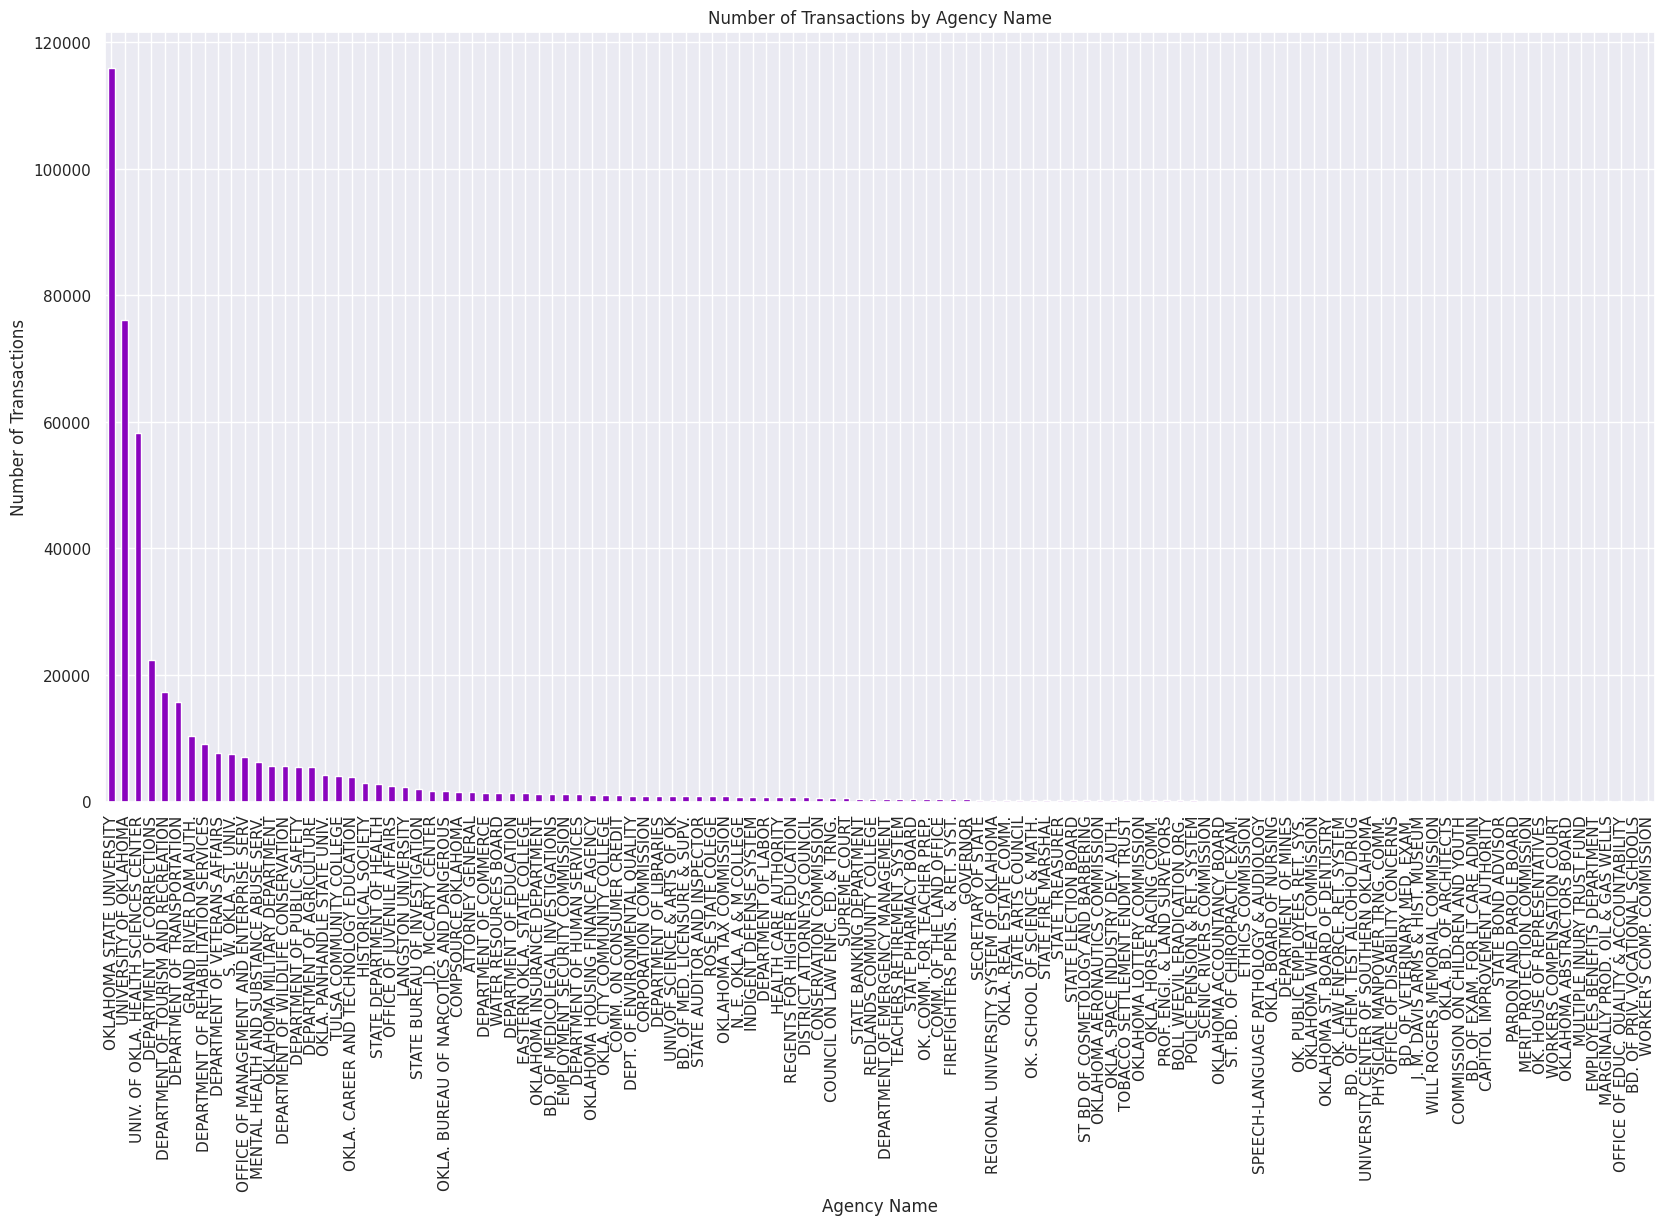

In [25]:
import matplotlib.pyplot as plt
agency_counts = df.groupby("Agency Name").size().sort_values(ascending=False)
agency_counts.plot(kind='bar', figsize=(20, 10))
plt.xlabel('Agency Name')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Agency Name')
fig = plt.gcf()
plt.show()
fig.savefig('./images/number_of_transactions_by_agency.png')


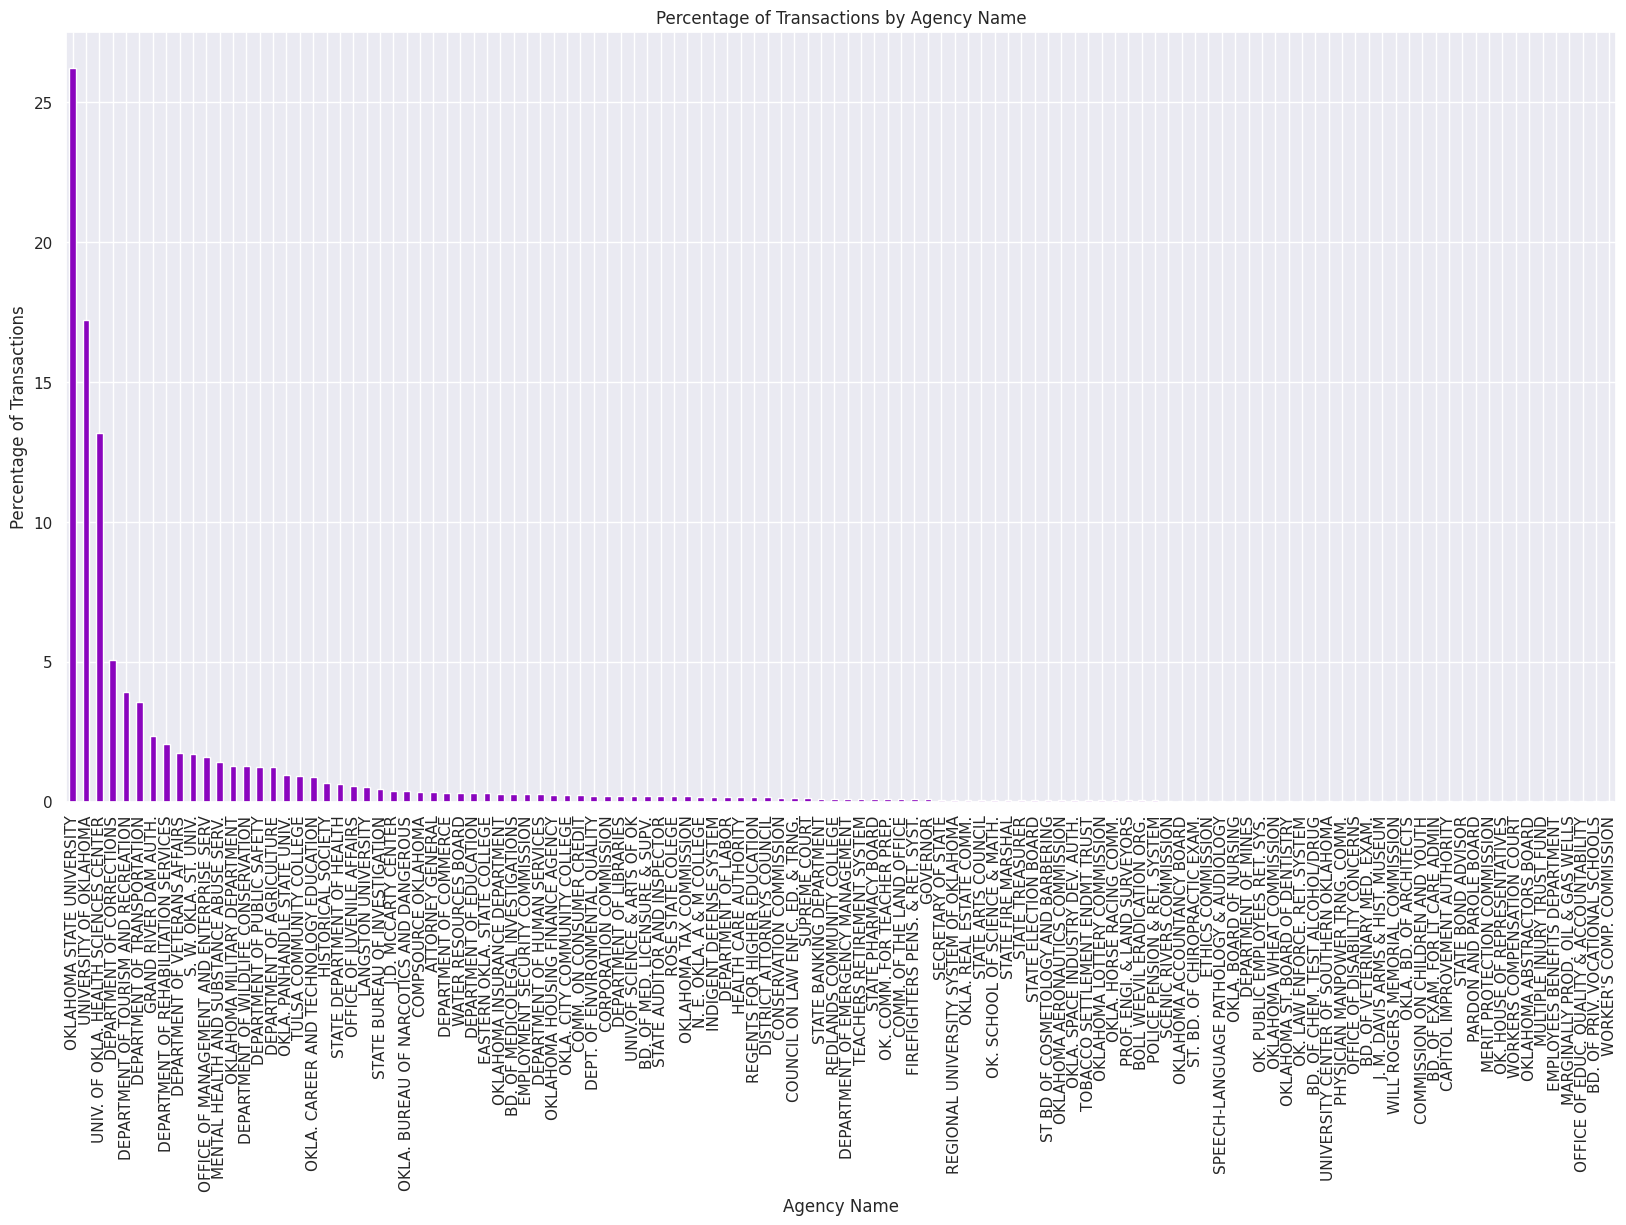

In [26]:
total_transactions = len(df)
agency_counts_percentage = (agency_counts / total_transactions) * 100

agency_counts_percentage.plot(kind='bar', figsize=(20, 10))
plt.xlabel('Agency Name')
plt.ylabel('Percentage of Transactions')
plt.title('Percentage of Transactions by Agency Name')
fig = plt.gcf()
plt.show()
fig.savefig('./images/percentage_of_transactions_by_agency.png')


In [27]:
sum(agency_counts_percentage.values[0:3])

56.57906341944399

In [28]:
sum(agency_counts_percentage.values[0:24])

90.56612307574014

In [29]:
pd.DataFrame(agency_counts_percentage).sort_values(0, ascending=False).head()

,0
Agency Name,
OKLAHOMA STATE UNIVERSITY,26.216747
UNIVERSITY OF OKLAHOMA,17.198535
UNIV. OF OKLA. HEALTH SCIENCES CENTER,13.163781
DEPARTMENT OF CORRECTIONS,5.048136
DEPARTMENT OF TOURISM AND RECREATION,3.897029


Seems that we have a pretty top-heavy dataset, in which the top 3 agencies account for over 55% of the transactions. The top 24 agencies account for over 90% of the transactions. I think we may also have to analyze if not only the *number* of transactions is skewed, but also the total transaction *volume*. Let's take a look at the `amount` field first and then merge these results.

### Amount

The amount field wasn't properly parsed, let's transform it all into float first.

In [30]:
import numpy as np
df['Amount'] = df['Amount'].astype(np.float32)

In [31]:
df['Amount'].describe()

count    4.421830e+05
mean     4.251841e+02
std      5.268139e+03
min     -4.286304e+04
25%      3.093000e+01
50%      1.049400e+02
75%      3.450000e+02
max      1.903858e+06
Name: Amount, dtype: float64

In [32]:
df[df['Amount'] < 0]

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
25,201307,1000,OKLAHOMA STATE UNIVERSITY,Foye,S,-30.000000,"AFFYMETRIX, INC",07/26/2013 12:00:00 AM,07/29/2013 12:00:00 AM,DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...
114,201307,1000,OKLAHOMA STATE UNIVERSITY,Henderson,K,-340.000000,INTERWRX (INTERWRX.COM),07/26/2013 12:00:00 AM,07/29/2013 12:00:00 AM,TELECOMMUNICATION EQUIPMENT AND TELEPHONE SALES
148,201307,1000,OKLAHOMA STATE UNIVERSITY,Flock,S,-258.000000,THE HOME DEPOT 3904,07/26/2013 12:00:00 AM,07/29/2013 12:00:00 AM,HOME SUPPLY WAREHOUSE STORES
178,201307,1000,OKLAHOMA STATE UNIVERSITY,Arthur,H,-167.199997,GRAND VISTA HOTEL SIMI VA,07/29/2013 12:00:00 AM,07/30/2013 12:00:00 AM,"LODGING--HOTELS,MOTELS,AND RESORTS"
185,201307,1000,OKLAHOMA STATE UNIVERSITY,Page,M,-39.259998,Amazon.com,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,BOOK STORES
...,...,...,...,...,...,...,...,...,...,...
442378,201406,98000,GRAND RIVER DAM AUTH.,Prince,S,-9.960000,BEST WESTERN CIMARRONHT,06/20/2014 12:00:00 AM,06/23/2014 12:00:00 AM,"LODGING--HOTELS,MOTELS,AND RESORTS"
442386,201406,98000,GRAND RIVER DAM AUTH.,Stroup,P,-136.000000,MATHESON-308,06/20/2014 12:00:00 AM,06/23/2014 12:00:00 AM,CHEMICALS AND ALLIED PRODUCTS NOT ELSEWHERE CL...
442392,201406,98000,GRAND RIVER DAM AUTH.,Yarbrough,K,-25.980000,TRACTOR SUPPLY #1102,06/20/2014 12:00:00 AM,06/23/2014 12:00:00 AM,"MISC. AUTOMOTIVE,AIRCRAFT,AND FARM EQUIPMENT D..."
442404,201406,98000,GRAND RIVER DAM AUTH.,Cardholder,e,-136.000000,MATHESON-308,06/19/2014 12:00:00 AM,06/20/2014 12:00:00 AM,CHEMICALS AND ALLIED PRODUCTS NOT ELSEWHERE CL...


In [33]:
df[(df['Amount'] < 0) & (df['Agency Number'] == 98000) & (df['Vendor'].str.contains('ESRI'))]

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
442425,201406,98000,GRAND RIVER DAM AUTH.,Jaggars,J,-1395.0,ESRI INC,06/17/2014 12:00:00 AM,06/19/2014 12:00:00 AM,COMPUTER SOFTWARE STORES


In [34]:
df[(df['Amount'] > 0) & (df['Agency Number'] == 98000) & (df['Vendor'].str.contains('ESRI'))]

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
366135,201403,98000,GRAND RIVER DAM AUTH.,Jaggars,J,1395.0,ESRI INC,03/28/2014 12:00:00 AM,03/31/2014 12:00:00 AM,COMPUTER SOFTWARE STORES
366479,201403,98000,GRAND RIVER DAM AUTH.,Hunter,G,4400.0,ESRI INC,03/13/2014 12:00:00 AM,03/14/2014 12:00:00 AM,COMPUTER SOFTWARE STORES


Looks like we have negative numbers indicating maybe reverse transactions (refunds?). It's good to know this in case we ever do some encoding/logging of these values.
 If we ever have to log the values, passing all these negative values into positive and setting a "Refund" column might be a good idea.

Looking through similar datasets on the internet, I found the the Oklahoma goverment's purchase card information (https://data.ok.gov/dataset), which seems to be source of the original dataset. Taking a look at examples from other fiscal years (omitted here), it seems that these negative values persist on all datasets.

In [35]:
df['Refund'] = df['Amount'] < 0
df['Amount'] = df['Amount'].abs()

In [36]:
len(df[df['Refund']]) / len(df)

0.03286195986729476

These negative values account for only about 3.2% of the total dataset. This could be interesting for maybe training a model to predict products/services that will be refunded?

For the sake of simplicity, I'll consider these refund values as outliers for now and leave them out of the dataset. We may revist them later for maybe modelling them.

In [37]:
df = df[~df['Refund']]
df = df.drop(columns=['Refund'])

In [38]:
df['Amount'].describe()

count    4.276520e+05
mean     4.479619e+02
std      5.352394e+03
min      1.000000e-02
25%      3.591000e+01
50%      1.134200e+02
75%      3.593000e+02
max      1.903858e+06
Name: Amount, dtype: float64

In [39]:
mean_total_transaction_volume = df.groupby('Agency Name')['Amount'].mean()

There seems to be something wrong with that max value, there may be an outlier.

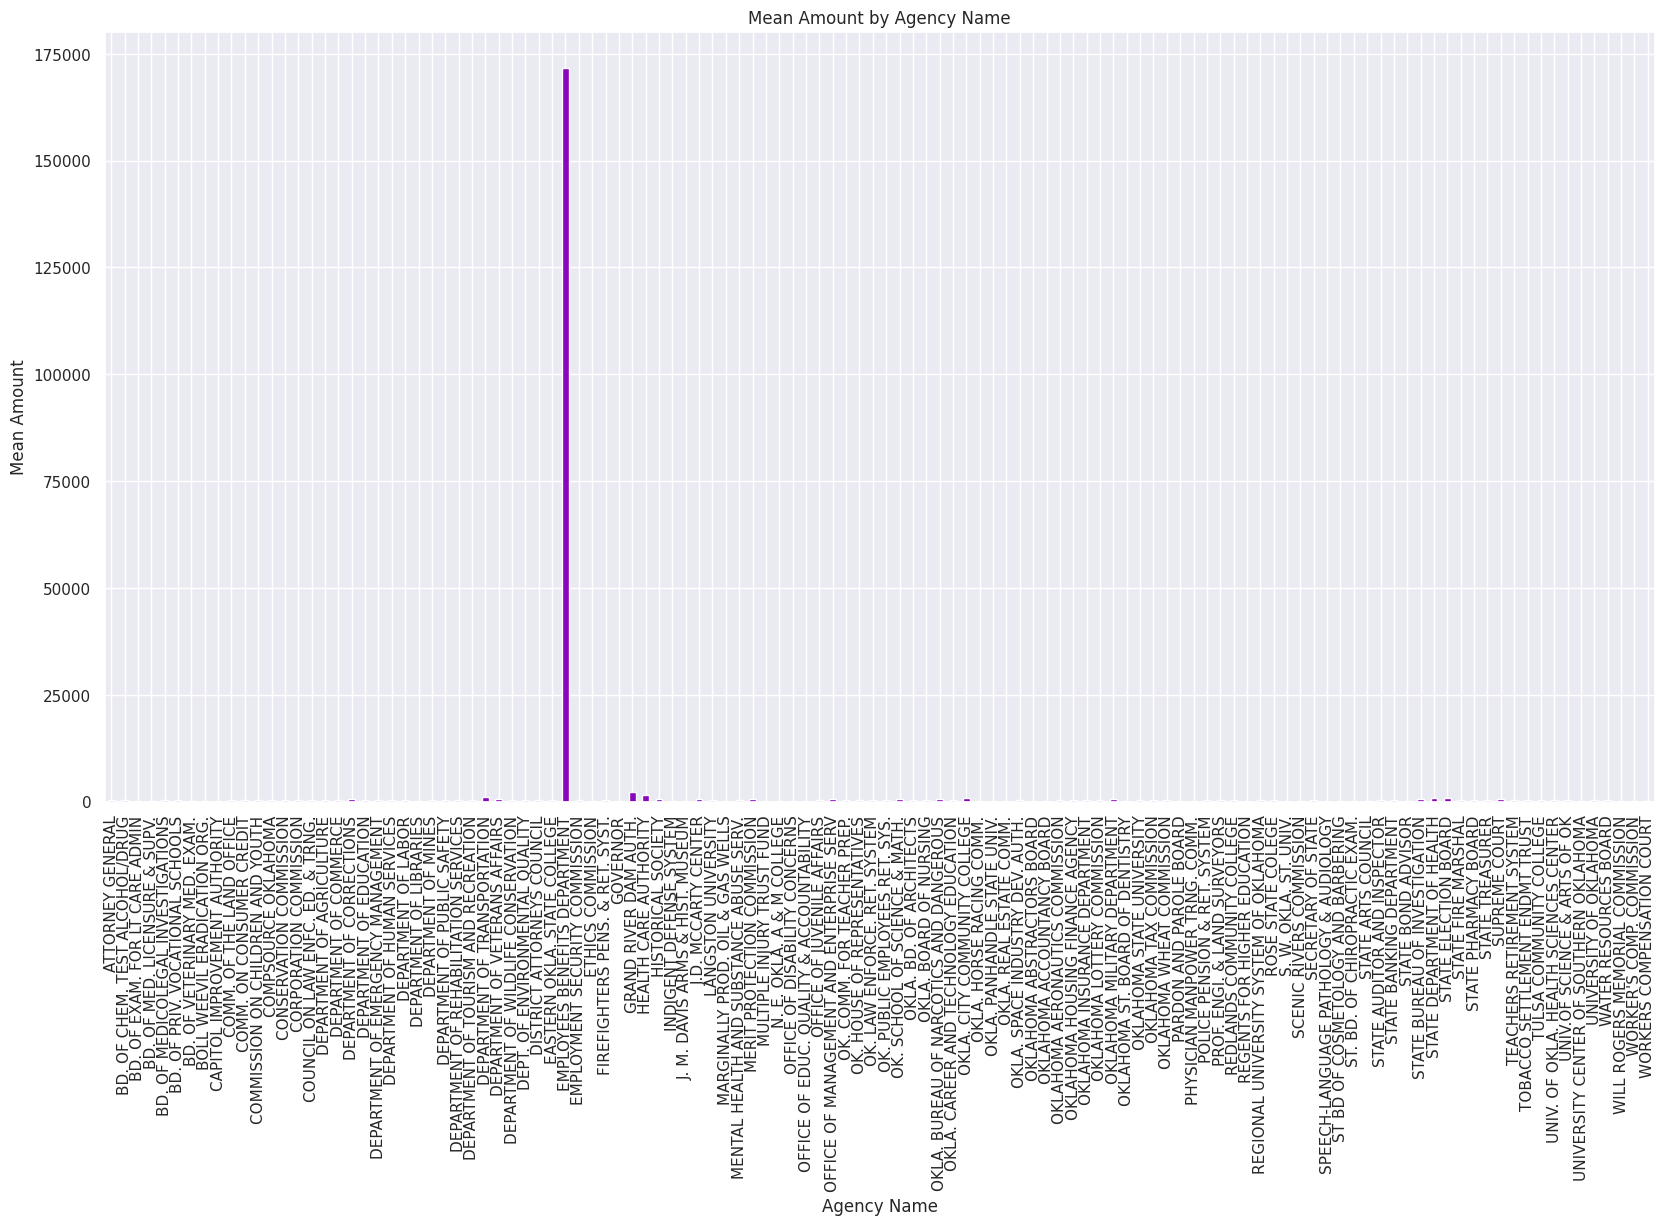

In [40]:
mean_total_transaction_volume.plot(kind='bar', figsize=(20, 10))
plt.xlabel('Agency Name')
plt.ylabel('Mean Amount')
plt.title('Mean Amount by Agency Name')
fig = plt.gcf()
plt.show()
fig.savefig('./images/mean_amount_by_agency_with_outliers.png')

In [41]:
df[df['Agency Name'].str.contains('EMPLOYEES BENEFITS')]

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
246477,201307,81500,EMPLOYEES BENEFITS DEPARTMENT,81500,8,343148.500000,PAYMENT ADJUSTMENT,06/13/2013 12:00:00 AM,07/03/2013 12:00:00 AM,OTHER FEES
246478,201307,81500,EMPLOYEES BENEFITS DEPARTMENT,81500,8,90.720001,CBR MAN CK,07/08/2013 12:00:00 AM,07/09/2013 12:00:00 AM,OTHER FEES


Yep, it seems that the EMPLOYEES BENEFITS DEPARTMENTS made only 2 purchases, one of them being a payment adjustment in a very high amount, which makes the mean be pretty high. Let's plot without this outlier.

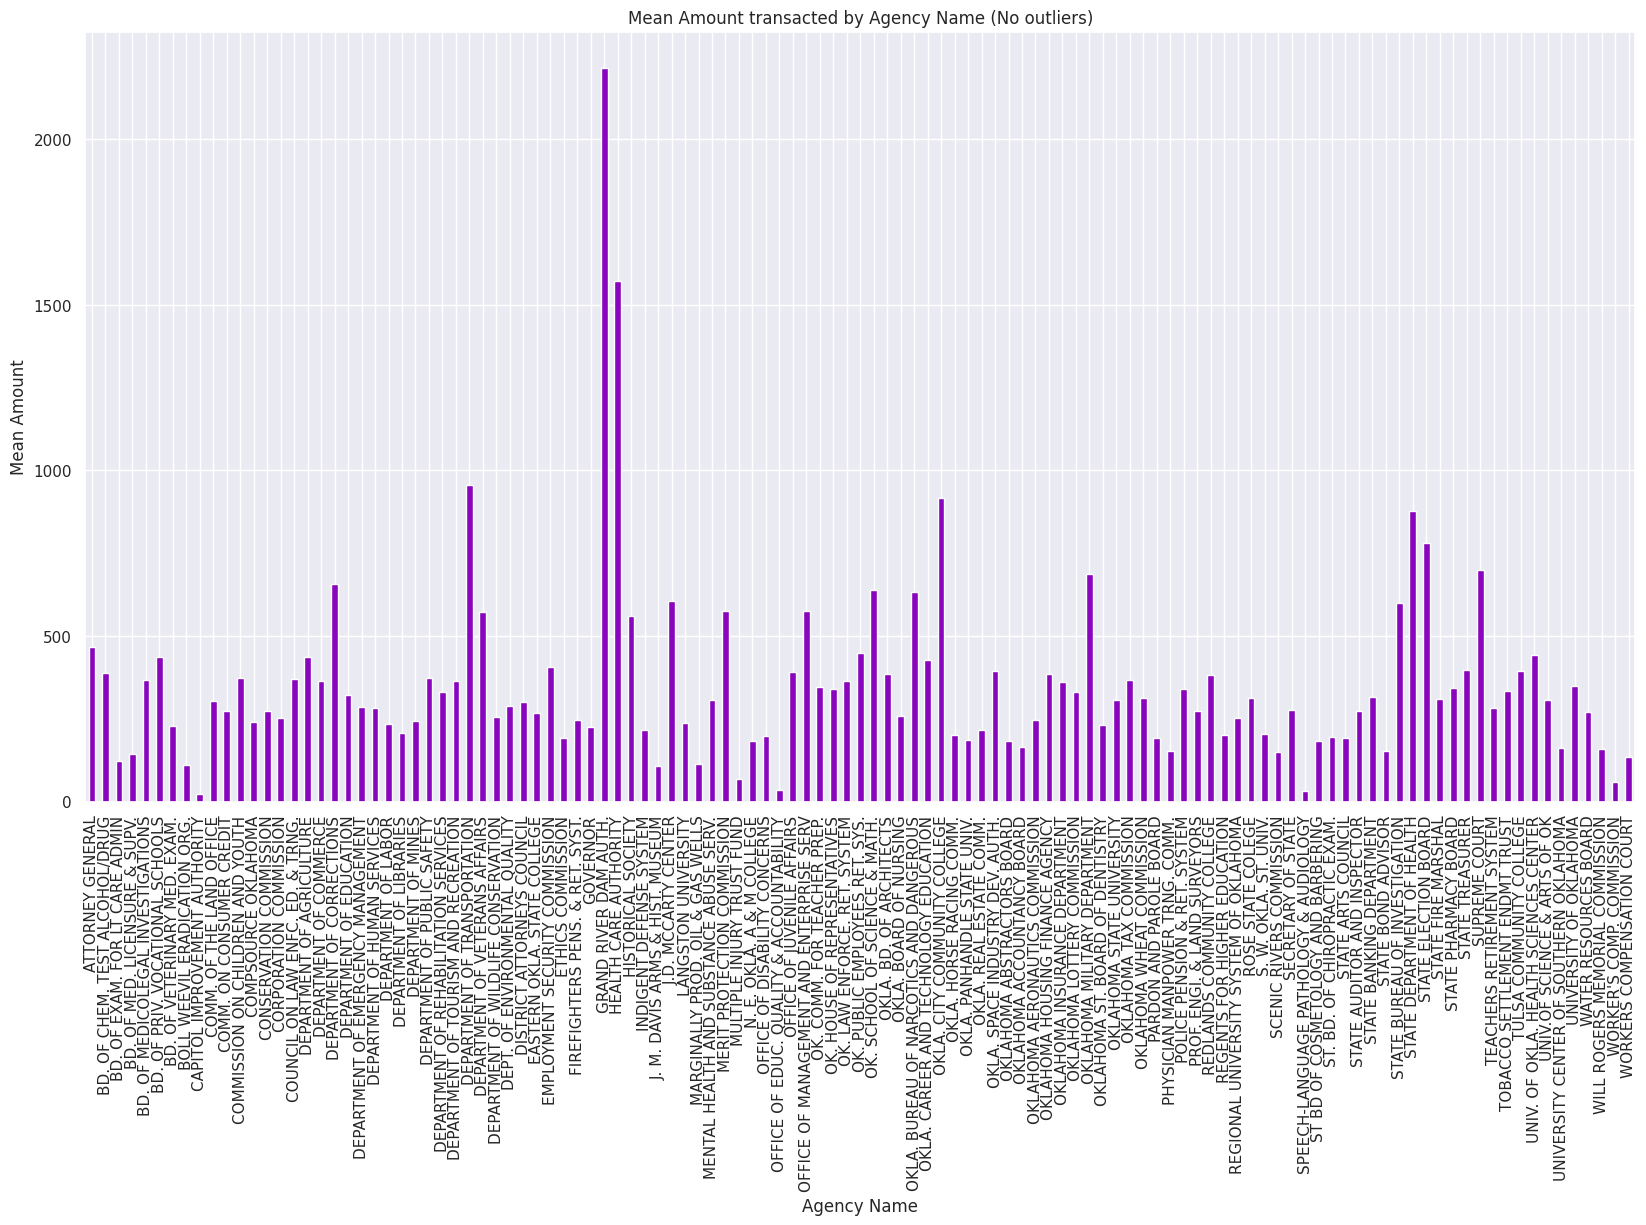

In [42]:
mean_total_transaction_volume_no_outliers = df[~df['Agency Name'].str.contains('EMPLOYEES BENEFITS')].groupby('Agency Name')['Amount'].mean()
mean_total_transaction_volume_no_outliers.plot(kind='bar', figsize=(20, 10))
plt.xlabel('Agency Name')
plt.ylabel('Mean Amount')
plt.title('Mean Amount transacted by Agency Name (No outliers)')
fig = plt.gcf()
plt.show()
fig.savefig('./images/mean_amount_by_agency.png')

Also for the sake of simplicity, we'll not consider this outlier in the dataset and strip it out due to the low amount of transactions and high transaction value.

In [43]:
df = df[~df['Agency Name'].str.contains('EMPLOYEES BENEFITS')]

In [44]:
mean_total_transaction_volume_no_outliers = pd.DataFrame(mean_total_transaction_volume_no_outliers)
mean_total_transaction_volume_no_outliers.sort_values('Amount', ascending=False).head()

,Amount
Agency Name,
GRAND RIVER DAM AUTH.,2214.941162
HEALTH CARE AUTHORITY,1571.762085
DEPARTMENT OF TRANSPORTATION,954.764160
OKLA. CITY COMMUNITY COLLEGE,915.287842
STATE DEPARTMENT OF HEALTH,878.278931


The first 2 agencies account for a lot of the mean transaction amount. Let's see if that is also the case for total transaction volume.

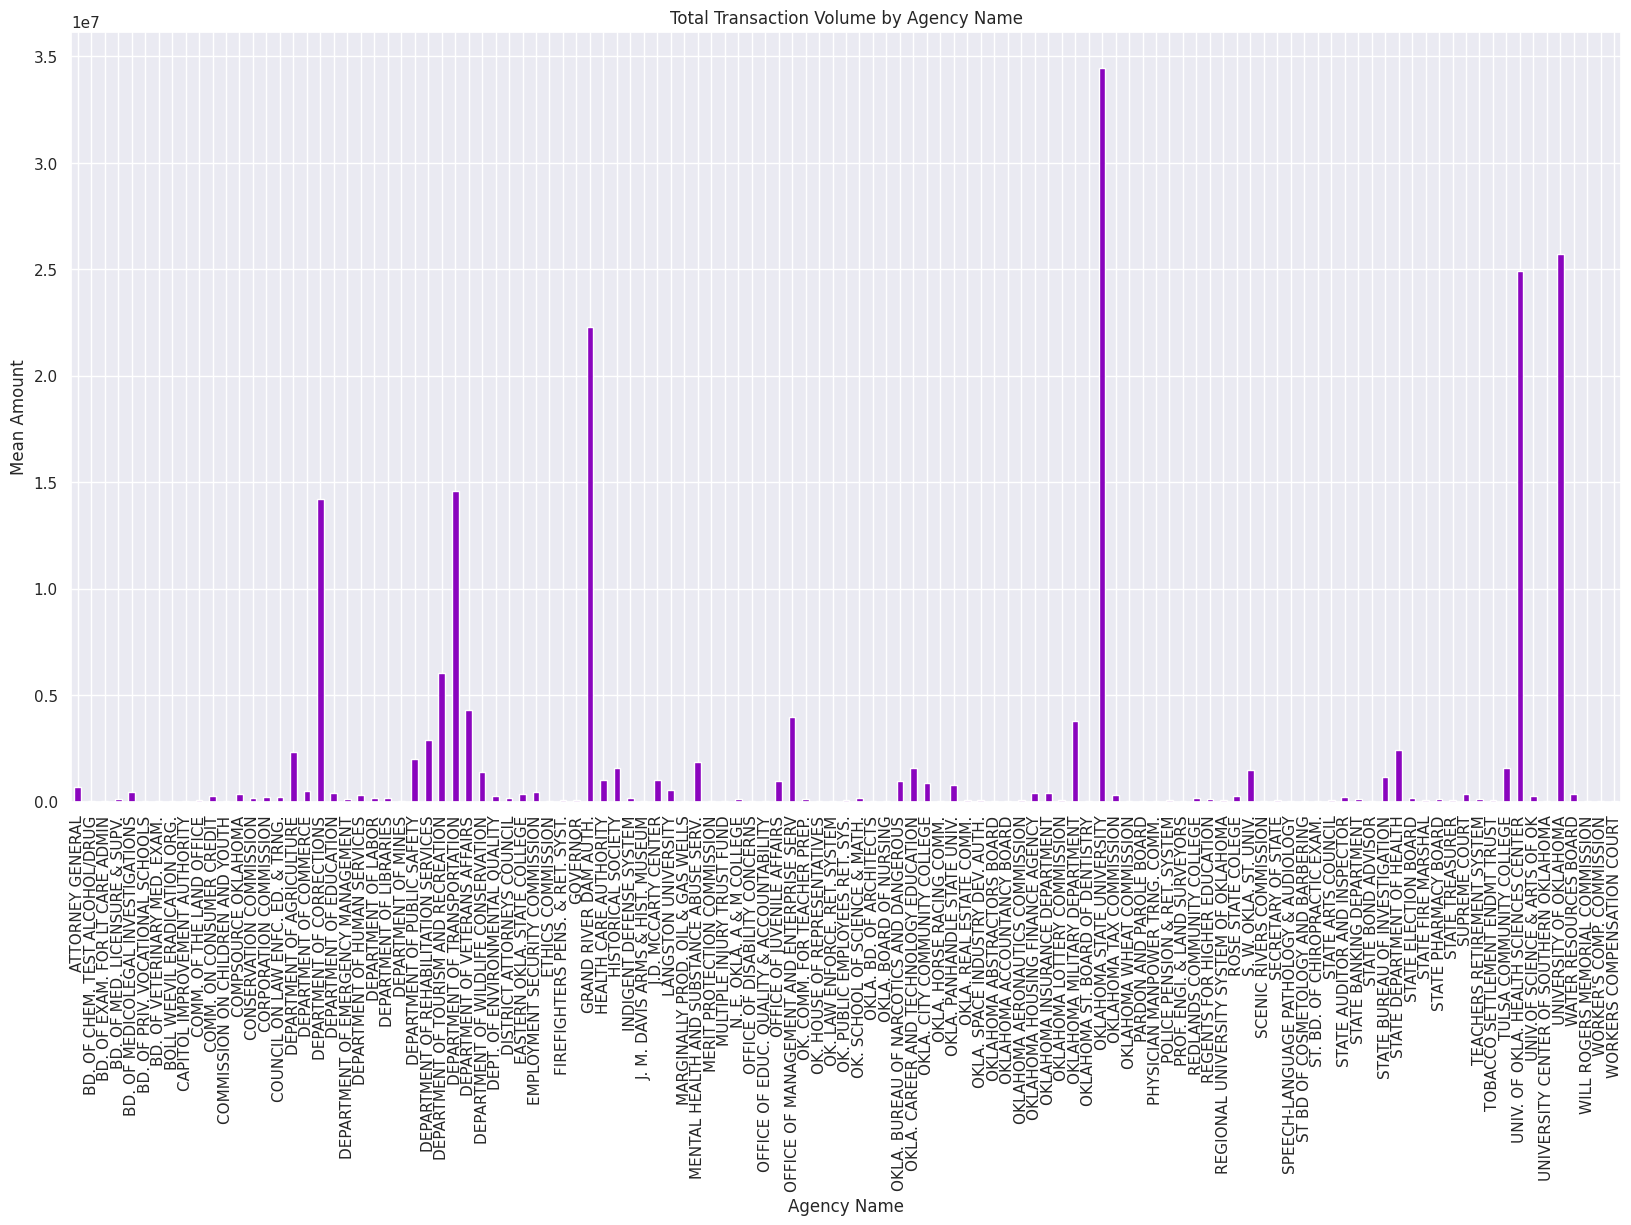

In [45]:
total_transaction_volume = df.groupby('Agency Name')['Amount'].sum()
total_transaction_volume.plot(kind='bar', figsize=(20, 10))
plt.xlabel('Agency Name')
plt.ylabel('Mean Amount')
plt.title('Total Transaction Volume by Agency Name')
fig = plt.gcf()
plt.show()
fig.savefig('./images/total_amount_by_agency.png')

In [46]:
pd.DataFrame(total_transaction_volume).sort_values('Amount', ascending=False).head()

,Amount
Agency Name,
OKLAHOMA STATE UNIVERSITY,34441420.0
UNIVERSITY OF OKLAHOMA,25690258.0
UNIV. OF OKLA. HEALTH SCIENCES CENTER,24921578.0
GRAND RIVER DAM AUTH.,22300028.0
DEPARTMENT OF TRANSPORTATION,14602163.0


This results are kinda of expected, as the top 3 agencies with the biggest total amount transacted are the ones with the most transaction counts. However, the 3rd and 4th don't follow this pattern, so we expected agencies like `GRAND RIVER DAM AUTH.` and `DEPARTMENT OF TRANSPORTATION` to transact bigger values than other agencies even though the count of transactions is smaller.

### 2. Vendors

Let's repeat the same analysis we did for the Agencies but now for the Vendors.

In [47]:
len(df['Vendor'].unique())

85580

That's a lot of vendors. There may be duplicated vendors due to different stores of the same company.

In [48]:
df['Vendor'].unique()

array(['NACAS', 'SHERATON HOTEL', 'SEARS.COM 9300', ...,
       'ACME TOOLS #110', 'W.S. DARLEY & CO.',
       'GENERATOR AND MOTOR SERVI'], dtype=object)

In [49]:
df[df['Vendor'].str.contains("SEARS")][['Vendor', 'Merchant Category Code (MCC)']].head(50)

,Vendor,Merchant Category Code (MCC)
2,SEARS.COM 9300,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...
1870,SEARS HOMETOWN 3647,DEPARTMENT STORES
2926,SEARS ROEBUCK 7931,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...
3112,SEARS HOMETOWN 3036,DEPARTMENT STORES
6046,GENE SEARS SUPPLY,SPORTING GOODS STORES
8106,SEARS ROEBUCK 7711,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...
10419,SEARS HOMETOWN 3036,DEPARTMENT STORES
11438,SEARS ROEBUCK 7711,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...
12699,SEARS HOMETOWN 3036,DEPARTMENT STORES
13143,SEARS HOMETOWN 3036,DEPARTMENT STORES


In [50]:
df[df['Vendor'].str.contains("ACME")]['Vendor'].unique()

array(['ACME FENCE OF OKLAHOMA C', 'ACME BRICK #261', 'IDN ACME INC',
       'ACME REESE AIR COND', 'ACME BRICK #230', 'ACME PRODUCTS COMPANY',
       'ACME OYSTER HOUSE', 'ACME JANITOR & CHEMICAL S', 'IACME',
       'ACME BRICK #260', 'ACME TOOLS #110'], dtype=object)

Yep, there are a lot of duplicated vendors. However, parsing this with regex may not be the best idea, as we kinda want to preserve the store number information for modelling. I believe text embeddings and cosine similarity may be enough to extract relational features from these cases. Let's keep it like this.

Let's try just one stupid thing and see if splitting the string in spaces allows us to reduce the total vendor space.

In [51]:
df_vendor = df.copy()
df_vendor['Vendor-Stripped'] = df_vendor['Vendor'].apply(lambda x: x.split(" ")[0])

In [52]:
len(df_vendor['Vendor-Stripped'].unique())

17611

In [53]:
pprint(df_vendor['Vendor-Stripped'].unique()[0:50])

array(['NACAS', 'SHERATON', 'SEARS.COM', 'WAL-MART', 'STAPLES', 'KYOCERA',
       'DAYLIGHT', 'UFIRST', 'AT&T', "RANDY'S", 'DEARINGER', 'GIDDINGS',
       'LOWES', 'OK', 'TFS', 'WESTERN', 'HOBBY-LOBBY', 'WESTIN', 'BIO',
       'LOCKE', 'NAPA', 'AFFYMETRIX,', 'EXPERIAN', 'AIRGAS', 'UCR',
       'TRAK1', 'TELVENT', 'UNITED', 'OPTIMUM', 'OPERON', 'FISHER',
       'Business', 'Amazon.com', 'THE', 'COURTYARD',
       'WWW.GREENFARMTOYS.COM', 'I-CAR', 'JAILHOUSE', 'B&C', 'NATURAL',
       'AUTO-CHLOR', 'WW', 'BRISTOW', 'DON', 'GARMIN', 'SPORTSMANS',
       'COUNCIL', 'MILLIPORE', 'ALLEGRA', 'CARE'], dtype=object)


Yeah no, there are still over 17000 unique vendors even with this. Worth a try tho.

In [54]:
df.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,890.000000,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,368.959991,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,165.820007,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,96.389999,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS"
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,125.959999,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT..."


Let's save this checkpoint here so the notebook won't get too long. We'll continue analyzing other columns on the next notebook. As a summary, here are the filters we've applied so far to the dataset:

1. Strip rows where all unnamed is not none.
2. Rename discrepant names
3. Amount casted to float
4. Refunded values are stripped.
5. Strip EMPLOYEE BENEFITS agency (outlier with a gigantic amount transacted but only 2 transactions)

We will compile these cleaning processes into `NuTable` so we can use in our workflow later.

In [55]:
len(df)

427650

In [56]:
df

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,890.000000,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,368.959991,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,165.820007,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,96.389999,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS"
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,125.959999,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT..."
...,...,...,...,...,...,...,...,...,...,...
442453,201406,98000,GRAND RIVER DAM AUTH.,Cardholder,e,992.000000,TOTAL VALVE SYSTEMS,06/20/2014 12:00:00 AM,06/23/2014 12:00:00 AM,HARDWARE EQUIPMENT AND SUPPLIES
442454,201406,98000,GRAND RIVER DAM AUTH.,Cardholder,e,2415.000000,PRYOR WASTE & RECYCLING L,06/20/2014 12:00:00 AM,06/23/2014 12:00:00 AM,"UTILITIES - ELECTRIC,GAS,WATER,SANITARY"
442455,201406,98000,GRAND RIVER DAM AUTH.,Cardholder,e,177.500000,ACCURATE ENVIROMENTAL LAB,06/20/2014 12:00:00 AM,06/23/2014 12:00:00 AM,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED
442456,201406,98000,GRAND RIVER DAM AUTH.,Cardholder,e,32457.000000,RED BUD SERVICE INC,06/19/2014 12:00:00 AM,06/23/2014 12:00:00 AM,PROFESSIONAL SERVICES NOT ELSEWHERE CLASSIFIED


Through this first cleaning process we took out dataset length from 442458 to 427650, stripping away 14808 rows. 

In [57]:
df.to_csv('nubank_checkpoint_01.csv', index=False)